In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read Data

In [2]:
tra = pd.read_csv('D://Kaggle//Space Titantic//train.csv')
tra.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


# Fill NA

In [3]:
tra['Age'] = tra['Age'].fillna(tra['Age'].mean())
tra['RoomService'] = tra['RoomService'].fillna(tra['RoomService'].mean())
tra['FoodCourt'] = tra['FoodCourt'].fillna(tra['FoodCourt'].mean())
tra['ShoppingMall'] = tra['ShoppingMall'].fillna(tra['ShoppingMall'].mean())
tra['Spa'] = tra['Spa'].fillna(tra['Spa'].mean())
tra['VRDeck'] = tra['VRDeck'].fillna(tra['VRDeck'].mean())
train = tra

In [4]:
tra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8693 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8693 non-null   float64
 9   ShoppingMall  8693 non-null   float64
 10  Spa           8693 non-null   float64
 11  VRDeck        8693 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
train = train.drop(columns=['PassengerId','Name'])
train

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


# Feature Engineering

HomePlanet

In [6]:
train['HomePlanet'].isnull().sum()

201

In [7]:
train['HomePlanet'] = train['HomePlanet'].fillna('NaN')
train['HomePlanet'].isnull().sum()

0

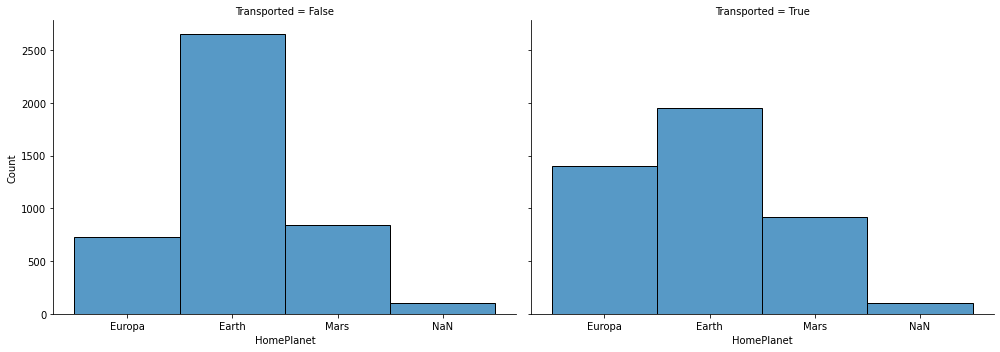

In [8]:
HomePlanet = train['HomePlanet']
sns.displot( 
  data=train, 
  x="HomePlanet", 
  col="Transported", 
  kind="hist", 
  aspect=1.4,  
  bins=20 
)


In [9]:
HomePlanet[HomePlanet=='Europa'] = 1
HomePlanet[HomePlanet=='Earth'] = -1
HomePlanet[HomePlanet=='Mars'] = 0
HomePlanet[HomePlanet=='NaN'] = 0
HomePlanet.head()

C:\Users\Aral\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Aral\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Aral\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we c

0     1
1    -1
2     1
3     1
4    -1
Name: HomePlanet, dtype: object

Destination

In [10]:
train['Destination'].isnull().sum()

182

In [11]:
train['Destination'] = train['Destination'].fillna('NaN')

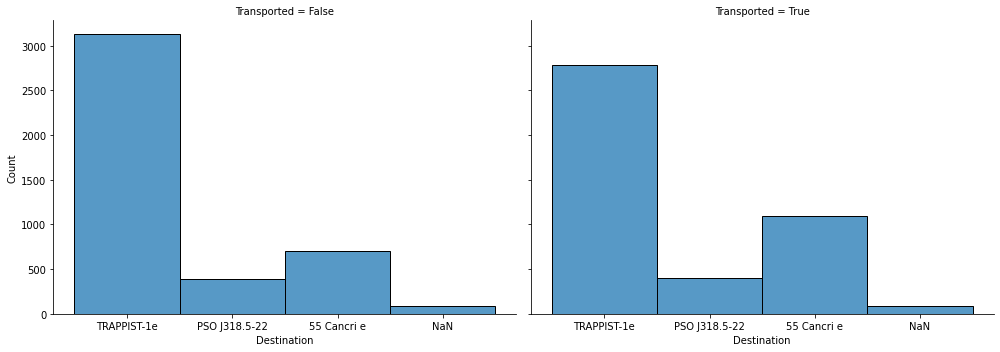

In [12]:
sns.displot( 
  data=train, 
  x="Destination", 
  col="Transported", 
  kind="hist", 
  aspect=1.4,  
  bins=20 
)

CryoSleep

In [13]:
train['CryoSleep'].isnull().sum()

217

In [14]:
cs = pd.concat([train['CryoSleep'],train['Transported']],axis=1)
cs = cs.dropna()
cs

,CryoSleep,Transported
0,False,False
1,False,True
2,False,False
3,False,False
4,False,True
...,...,...
8688,False,False
8689,True,False
8690,False,True
8691,False,False


In [15]:
from sklearn import preprocessing
lbl = preprocessing.LabelEncoder()
cs['CryoSleep'] = lbl.fit_transform(cs['CryoSleep'].astype(bool))

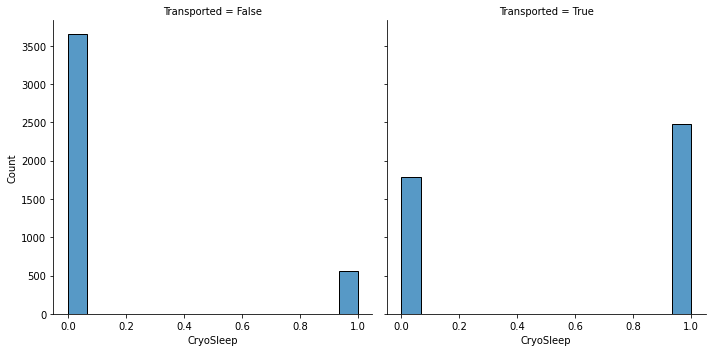

In [16]:
sns.displot( 
  data=cs, 
  x="CryoSleep", 
  col="Transported", 
  kind="hist",  
)

In [17]:
CryoSleep = train['CryoSleep']
CryoSleep = CryoSleep.fillna(0)
CryoSleep[CryoSleep==True] = 1
CryoSleep[CryoSleep==False] = -1
CryoSleep

0       -1
1       -1
2       -1
3       -1
4       -1
        ..
8688    -1
8689     1
8690    -1
8691    -1
8692    -1
Name: CryoSleep, Length: 8693, dtype: object

VIP

In [18]:
VIP = train['VIP']
VIP.isnull().sum()

203

In [19]:
v = pd.concat([train['VIP'],train['Transported']],axis=1)
v = v.dropna()
v

,VIP,Transported
0,False,False
1,False,True
2,True,False
3,False,False
4,False,True
...,...,...
8688,True,False
8689,False,False
8690,False,True
8691,False,False


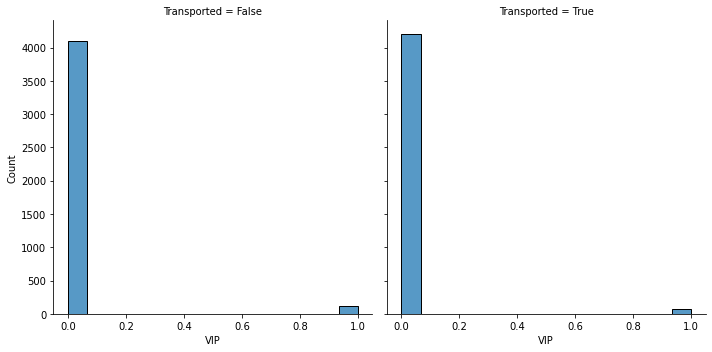

In [20]:
v['VIP'] = lbl.fit_transform(v['VIP'].astype(bool))
sns.displot( 
  data=v, 
  x="VIP", 
  col="Transported", 
  kind="hist",  
)

Cabin

In [21]:
ca = train['Cabin']
ca= ca.fillna('NaN/-1/NAN')
Cabin_dis = []
Cabin_num = []
Cabin_lr = []

for i in range(len(ca)):
    now = ca[i].split('/')
    Cabin_dis.append(now[0])
    Cabin_num.append(int(now[1]))
    Cabin_lr.append(now[2])

deck

In [22]:
set(Cabin_dis)

{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'NaN', 'T'}

In [23]:
Cabin_dis = pd.DataFrame(Cabin_dis,columns=['Cabin_dis'])
Cabin_dis

,Cabin_dis
0,B
1,F
2,A
3,A
4,F
...,...
8688,A
8689,G
8690,G
8691,E


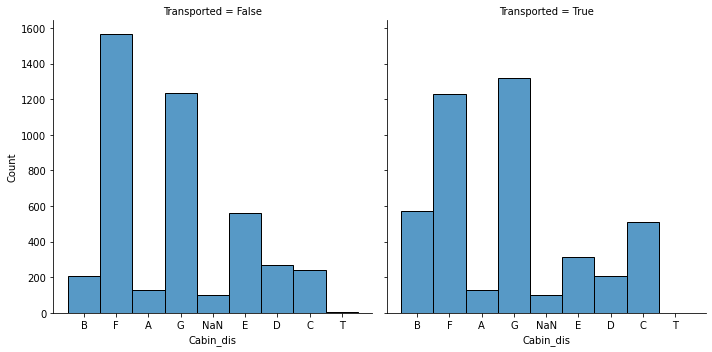

In [24]:
deck = pd.concat([Cabin_dis,train['Transported']],axis=1)
sns.displot( 
  data=deck, 
  x="Cabin_dis", 
  col="Transported", 
  kind="hist",  
)

In [25]:
Num = pd.DataFrame(Cabin_num,columns=['Cabin_num'])

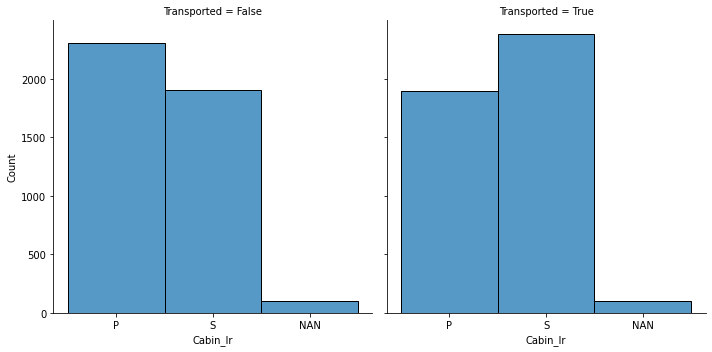

In [26]:
Cabin_side = pd.DataFrame(Cabin_lr,columns=['Cabin_lr'])
side = pd.concat([Cabin_side,train['Transported']],axis=1)
sns.displot( 
  data=side, 
  x="Cabin_lr", 
  col="Transported", 
  kind="hist",  
)

In [27]:
Side=pd.get_dummies(Cabin_lr)
Side = Side.drop(columns = ['NAN'])
Side

,P,S
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
8688,1,0
8689,0,1
8690,0,1
8691,0,1


Label

In [28]:
Transported = train['Transported']
Transported.columns = 'Transported'
Transported

0       False
1        True
2       False
3       False
4        True
        ...  
8688    False
8689    False
8690     True
8691    False
8692     True
Name: Transported, Length: 8693, dtype: bool

Final train data and label

In [29]:
train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,-1,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,1,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,1,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,-1,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [30]:
final_train = pd.concat([HomePlanet, CryoSleep],axis=1)
#final_train = pd.concat([final_train, Destination],axis=1)
#final_train = pd.concat([final_train, VIP],axis=1)
final_train = pd.concat([final_train, train['Age']],axis=1)
final_train = pd.concat([final_train, train['RoomService']],axis=1)
final_train = pd.concat([final_train, train['FoodCourt']],axis=1)
final_train = pd.concat([final_train, train['ShoppingMall']],axis=1)
final_train = pd.concat([final_train, train['Spa']],axis=1)
final_train = pd.concat([final_train, train['VRDeck']],axis=1)
final_train = final_train.reset_index()
final_train = final_train.drop(columns=['index'])
#final_train = pd.concat([final_train, deck],axis=1)
final_train = pd.concat([final_train, Side],axis=1)
final_train = pd.concat([final_train, Num],axis=1)
final_train 

,HomePlanet,CryoSleep,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,P,S,Cabin_num
0,1,-1,39.0,0.0,0.0,0.0,0.0,0.0,1,0,0
1,-1,-1,24.0,109.0,9.0,25.0,549.0,44.0,0,1,0
2,1,-1,58.0,43.0,3576.0,0.0,6715.0,49.0,0,1,0
3,1,-1,33.0,0.0,1283.0,371.0,3329.0,193.0,0,1,0
4,-1,-1,16.0,303.0,70.0,151.0,565.0,2.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
8688,1,-1,41.0,0.0,6819.0,0.0,1643.0,74.0,1,0,98
8689,-1,1,18.0,0.0,0.0,0.0,0.0,0.0,0,1,1499
8690,-1,-1,26.0,0.0,0.0,1872.0,1.0,0.0,0,1,1500
8691,1,-1,32.0,0.0,1049.0,0.0,353.0,3235.0,0,1,608


In [31]:
label = Transported.reset_index()
label = label.drop(columns = ['index'])
label

,Transported
0,False
1,True
2,False
3,False
4,True
...,...
8688,False
8689,False
8690,True
8691,False


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 [Text(0, 0.5, 'Age'),
  Text(0, 1.5, 'RoomService'),
  Text(0, 2.5, 'FoodCourt'),
  Text(0, 3.5, 'ShoppingMall'),
  Text(0, 4.5, 'Spa'),
  Text(0, 5.5, 'VRDeck'),
  Text(0, 6.5, 'P'),
  Text(0, 7.5, 'S'),
  Text(0, 8.5, 'Cabin_num'),
  Text(0, 9.5, 'Transported')])

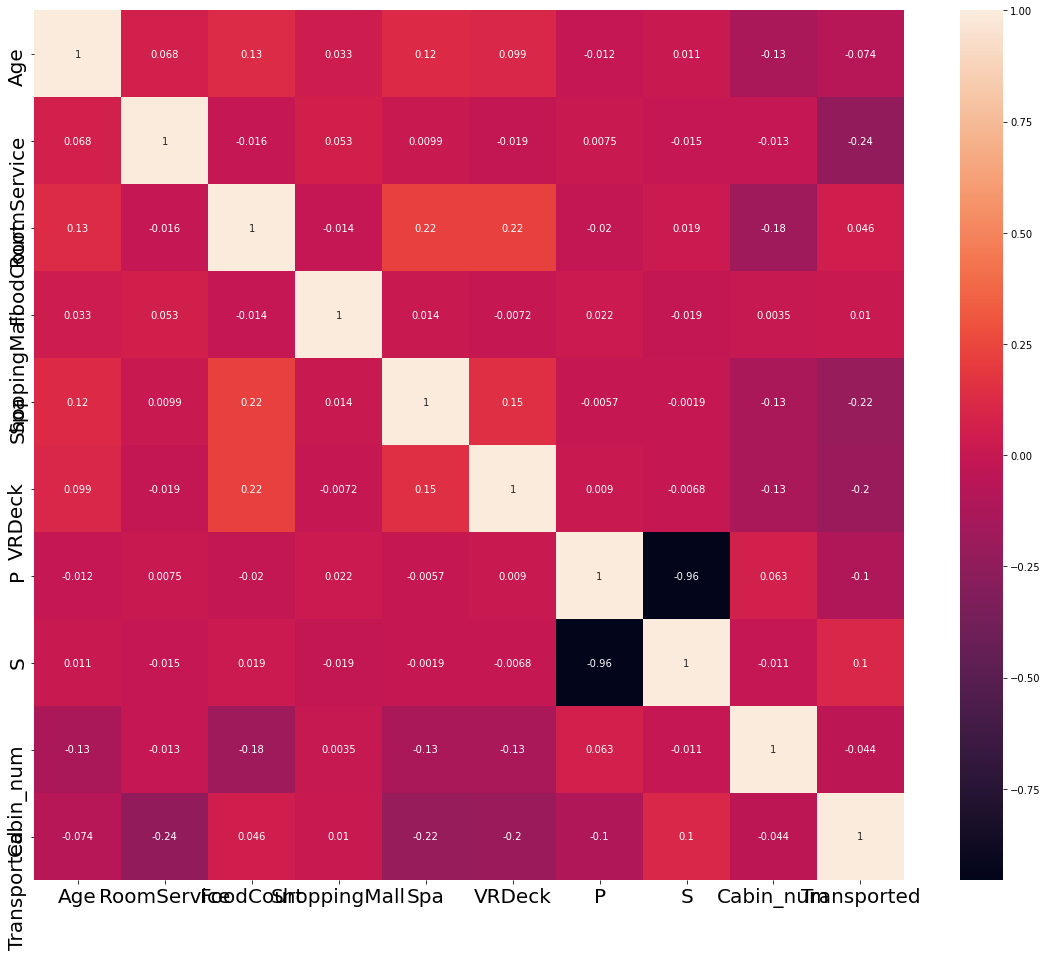

In [32]:
correlation = pd.concat([final_train, label],axis=1)
ax = plt.subplots(figsize=(20, 16))
ax = sns.heatmap(correlation.corr(), square=True, annot=True)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

In [33]:
correlation.head()

,HomePlanet,CryoSleep,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,P,S,Cabin_num,Transported
0,1,-1,39.0,0.0,0.0,0.0,0.0,0.0,1,0,0,False
1,-1,-1,24.0,109.0,9.0,25.0,549.0,44.0,0,1,0,True
2,1,-1,58.0,43.0,3576.0,0.0,6715.0,49.0,0,1,0,False
3,1,-1,33.0,0.0,1283.0,371.0,3329.0,193.0,0,1,0,False
4,-1,-1,16.0,303.0,70.0,151.0,565.0,2.0,0,1,1,True


# Predict

In [34]:
final_train

,HomePlanet,CryoSleep,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,P,S,Cabin_num
0,1,-1,39.0,0.0,0.0,0.0,0.0,0.0,1,0,0
1,-1,-1,24.0,109.0,9.0,25.0,549.0,44.0,0,1,0
2,1,-1,58.0,43.0,3576.0,0.0,6715.0,49.0,0,1,0
3,1,-1,33.0,0.0,1283.0,371.0,3329.0,193.0,0,1,0
4,-1,-1,16.0,303.0,70.0,151.0,565.0,2.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
8688,1,-1,41.0,0.0,6819.0,0.0,1643.0,74.0,1,0,98
8689,-1,1,18.0,0.0,0.0,0.0,0.0,0.0,0,1,1499
8690,-1,-1,26.0,0.0,0.0,1872.0,1.0,0.0,0,1,1500
8691,1,-1,32.0,0.0,1049.0,0.0,353.0,3235.0,0,1,608


In [83]:
from sklearn import preprocessing
lbl = preprocessing.LabelEncoder()
final_train['HomePlanet'] = lbl.fit_transform(final_train['HomePlanet'].astype(int))
final_train['CryoSleep'] = lbl.fit_transform(final_train['CryoSleep'].astype(bool))#将提示的包含错误数据类型这一列进行转换
#final_train['VIP'] = lbl.fit_transform(final_train['VIP'].astype(bool))#将提示的包含错误数据类型这一列进行转换

In [84]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from xgboost import plot_importance


x_train, x_test, y_train, y_test = train_test_split(final_train, label, test_size=0.20,random_state=42,shuffle=True)
model = XGBClassifier(learning_rate=0.1,
                      #n_estimatores
                      #含义：总共迭代的次数，即决策树的个数
                      n_estimators=1000,
                      #max_depth
                      #含义：树的深度，默认值为6，典型值3-10。
                      max_depth=6,
                      #min_child_weight
                      #调参：值越大，越容易欠拟合；值越小，越容易过拟合
                      #（值较大时，避免模型学习到局部的特殊样本）。
                      min_child_weight = 2,
                      #惩罚项系数，指定节点分裂所需的最小损失函数下降值。
                      gamma = 0,
                      #subsample
                      #含义：训练每棵树时，使用的数据占全部训练集的比例。
                      # 默认值为1，典型值为0.5-1。
                      subsample = 0.8,
                      #colsample_bytree
                      #含义：训练每棵树时，使用的特征占全部特征的比例。默认值为1，典型值为0.5-1。
                      colsample_btree = 0.8,
                      #objective 目标函数
                      #multi：softmax num_class=n 返回类别
                      objective = 'multi:softmax',
                      num_class = 2,
                      #scale_pos_weight
                      #正样本的权重，在二分类任务中，当正负样本比例失衡时，设置正样本的权重，模型效果更好。例如，当正负样本比例为1:10时，scale_pos_weight=10
                      scale_pos_weight = 1,
                      random_state= 27
                      )
 
model.fit(x_train, y_train,
          eval_set=[(x_test,y_test)],
          eval_metric = 'mlogloss',
          early_stopping_rounds = 10,
          verbose = True)


[10:47:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { colsample_btree, scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-mlogloss:0.65576
[1]	validation_0-mlogloss:0.62528
[2]	validation_0-mlogloss:0.59864
[3]	validation_0-mlogloss:0.57786
[4]	validation_0-mlogloss:0.55947
[5]	validation_0-mlogloss:0.54419
[6]	validation_0-mlogloss:0.53081
[7]	validation_0-mlogloss:0.51943
[8]	validation_0-mlogloss:0.50919
[9]	validation_0-mlogloss:0.50085
[10]	validation_0-mlogloss:0.49375
[11]	validation_0-mlogloss:0.48679
[12]	validation_0-mlogloss:0.48087
[13]	validation_0-mlogloss:0.47543
[14]	validation_0-mlogloss:0.47119
[15]	validation_0-mlogloss:0.46755
[16]	validation_0-mlogloss:0.46373
[17]

XGBClassifier(base_score=0.5, booster='gbtree', colsample_btree=0.8,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=2, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=8,
              num_class=2, num_parallel_tree=1, objective='multi:softmax',
              random_state=27, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.8, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [37]:
y_pred = model.predict(x_train)
accuracy = accuracy_score(y_train,y_pred)
print("accuarcy: %.2f%%" % (accuracy * 100.0))

accuarcy: 84.54%


In [38]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print("accuarcy: %.2f%%" % (accuracy * 100.0))

accuarcy: 79.70%


In [52]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline

Hyper_Pipe = Pipeline(steps=[
    ('model',XGBClassifier(n_estimators=1000,max_depth=3, random_state=1)),
])
Hyper_Pipe.fit(x_train,y_train)

C:\Users\Aral\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[10:36:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('model',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=3, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=1000,
                               n_jobs=8, num_parallel_tree=1, random_state=1,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

In [53]:
y_pred = Hyper_Pipe.predict(x_train)
accuracy = accuracy_score(y_train,y_pred)
print("accuarcy: %.2f%%" % (accuracy * 100.0))

accuarcy: 93.80%


In [54]:
param_grid={'model__n_estimators':[500,1000],'model__learning_rate':[0.1,0.2],'verbose':[1],'model__max_depth':[2,3]}
from sklearn.model_selection import GridSearchCV
gcv=GridSearchCV(Hyper_Pipe,param_grid=param_grid,cv=5,scoring="roc_auc")
gcv.fit(x_train,y_train)

C:\Users\Aral\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[10:36:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[Pipeline] ............. (step 1 of 1) Processing model, total=   0.7s
[10:36:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Aral\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[Pipeline] ............. (step 1 of 1) Processing model, total=   0.7s
[10:36:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Aral\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[Pipeline] ............. (step 1 of 1) Processing model, total=   0.6s
[10:36:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Aral\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[Pipeline] ............. (step 1 of 1) Processing model, total=   0.7s
[10:36:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Aral\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[Pipeline] ............. (step 1 of 1) Processing model, total=   0.7s
[10:36:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Aral\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[Pipeline] ............. (step 1 of 1) Processing model, total=   1.3s
[10:36:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Aral\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[Pipeline] ............. (step 1 of 1) Processing model, total=   1.3s
[10:36:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Aral\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[Pipeline] ............. (step 1 of 1) Processing model, total=   1.5s
[10:36:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Aral\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[Pipeline] ............. (step 1 of 1) Processing model, total=   1.3s
[10:36:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Aral\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[Pipeline] ............. (step 1 of 1) Processing model, total=   1.3s
[10:36:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Aral\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[Pipeline] ............. (step 1 of 1) Processing model, total=   0.9s
[10:36:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Aral\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[Pipeline] ............. (step 1 of 1) Processing model, total=   0.9s
[10:36:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Aral\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[Pipeline] ............. (step 1 of 1) Processing model, total=   0.9s
[10:36:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Aral\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[Pipeline] ............. (step 1 of 1) Processing model, total=   0.9s
[10:36:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Aral\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[Pipeline] ............. (step 1 of 1) Processing model, total=   0.9s
[10:36:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Aral\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[Pipeline] ............. (step 1 of 1) Processing model, total=   1.7s
[10:36:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Aral\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[Pipeline] ............. (step 1 of 1) Processing model, total=   2.0s
[10:36:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Aral\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[Pipeline] ............. (step 1 of 1) Processing model, total=   1.7s
[10:36:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Aral\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[Pipeline] ............. (step 1 of 1) Processing model, total=   1.8s
[10:36:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Aral\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[Pipeline] ............. (step 1 of 1) Processing model, total=   1.8s
[10:36:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Aral\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[Pipeline] ............. (step 1 of 1) Processing model, total=   0.7s
[10:36:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Aral\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[Pipeline] ............. (step 1 of 1) Processing model, total=   0.7s
[10:36:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Aral\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[Pipeline] ............. (step 1 of 1) Processing model, total=   0.7s
[10:36:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Aral\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[Pipeline] ............. (step 1 of 1) Processing model, total=   0.7s
[10:36:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Aral\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[Pipeline] ............. (step 1 of 1) Processing model, total=   0.9s
[10:36:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Aral\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[Pipeline] ............. (step 1 of 1) Processing model, total=   1.4s
[10:36:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Aral\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[Pipeline] ............. (step 1 of 1) Processing model, total=   1.3s
[10:36:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Aral\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[Pipeline] ............. (step 1 of 1) Processing model, total=   1.4s
[10:36:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Aral\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[Pipeline] ............. (step 1 of 1) Processing model, total=   1.4s
[10:36:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Aral\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[Pipeline] ............. (step 1 of 1) Processing model, total=   1.5s
[10:36:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Aral\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[Pipeline] ............. (step 1 of 1) Processing model, total=   1.0s
[10:36:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Aral\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[Pipeline] ............. (step 1 of 1) Processing model, total=   1.0s
[10:36:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Aral\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[Pipeline] ............. (step 1 of 1) Processing model, total=   1.1s
[10:36:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Aral\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[Pipeline] ............. (step 1 of 1) Processing model, total=   1.1s
[10:36:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Aral\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[Pipeline] ............. (step 1 of 1) Processing model, total=   1.1s
[10:36:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Aral\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[Pipeline] ............. (step 1 of 1) Processing model, total=   1.9s
[10:36:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Aral\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[Pipeline] ............. (step 1 of 1) Processing model, total=   1.9s
[10:36:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Aral\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[Pipeline] ............. (step 1 of 1) Processing model, total=   1.9s
[10:36:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Aral\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[Pipeline] ............. (step 1 of 1) Processing model, total=   1.9s
[10:37:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Aral\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[Pipeline] ............. (step 1 of 1) Processing model, total=   2.1s
[10:37:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Aral\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[Pipeline] ............. (step 1 of 1) Processing model, total=   1.1s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        XGBClassifier(base_score=0.5,
                                                      booster='gbtree',
                                                      colsample_bylevel=1,
                                                      colsample_bynode=1,
                                                      colsample_bytree=1,
                                                      gamma=0, gpu_id=-1,
                                                      importance_type='gain',
                                                      interaction_constraints='',
                                                      learning_rate=0.300000012,
                                                      max_delta_step=0,
                                                      max_depth=3,
                                                      min_child_weight=1,
                                       

In [55]:
params = gcv.best_params_
params

{'model__learning_rate': 0.1,
 'model__max_depth': 3,
 'model__n_estimators': 500,
 'verbose': 1}

In [82]:
Hyper_Pipe = Pipeline(steps=[
    ('model',XGBClassifier(n_estimators=1000,max_depth=3, random_state=1)),
])
Hyper_Pipe.fit(x_train,y_train)

C:\Users\Aral\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBoostError: [10:47:34] C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/data/data.cc:556: Check failed: labels_.Size() == num_row_ (7824 vs. 6954) : Size of labels must equal to number of rows.

In [66]:
y_pred = Hyper_Pipe.predict(x_train)
accuracy = accuracy_score(y_train,y_pred)
print("accuarcy: %.2f%%" % (accuracy * 100.0))

accuarcy: 93.80%


In [67]:
y_pred = Hyper_Pipe.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print("accuarcy: %.2f%%" % (accuracy * 100.0))

accuarcy: 78.15%


In [162]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(         learning_rate =0.1, n_estimators=1000, max_depth=3,
min_child_weight=1, gamma=0, subsample=0.8,             colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4,     scale_pos_weight=1, seed=27), 
 param_grid = param_test1,     scoring='roc_auc',n_jobs=4, cv=5)
gsearch1.fit(x_train,y_train)
means = gsearch1.cv_results_['mean_test_score']
params = gsearch1.cv_results_['params']
print(means,params)


KeyboardInterrupt: 

In [87]:
means = gsearch1.cv_results_['mean_test_score']
params = gsearch1.cv_results_['params']
print(means,params)

[0.87906498 0.87900649 0.87892972 0.87077547 0.87036786 0.87126111
 0.86607665 0.86540393 0.86714569 0.86270931 0.86312925 0.86543713] [{'max_depth': 3, 'min_child_weight': 1}, {'max_depth': 3, 'min_child_weight': 3}, {'max_depth': 3, 'min_child_weight': 5}, {'max_depth': 5, 'min_child_weight': 1}, {'max_depth': 5, 'min_child_weight': 3}, {'max_depth': 5, 'min_child_weight': 5}, {'max_depth': 7, 'min_child_weight': 1}, {'max_depth': 7, 'min_child_weight': 3}, {'max_depth': 7, 'min_child_weight': 5}, {'max_depth': 9, 'min_child_weight': 1}, {'max_depth': 9, 'min_child_weight': 3}, {'max_depth': 9, 'min_child_weight': 5}]


In [163]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=1000, max_depth=3,
 min_child_weight=3, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4, cv=5)
gsearch3.fit(x_train,y_train)
means = gsearch3.cv_results_['mean_test_score']
params = gsearch3.cv_results_['params']
print(means,params)

C:\Users\Aral\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[17:06:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.87900649 0.87928853 0.87937118 0.87934773 0.87958464] [{'gamma': 0.0}, {'gamma': 0.1}, {'gamma': 0.2}, {'gamma': 0.3}, {'gamma': 0.4}]


In [98]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=1000, max_depth=3,
 min_child_weight=3, gamma=0.2, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4, cv=5)
gsearch4.fit(x_train,y_train)
means = gsearch4.cv_results_['mean_test_score']
params = gsearch4.cv_results_['params']
print(means,params)

C:\Users\Aral\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[11:05:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.87926344 0.87921653 0.87969562 0.87999647 0.87816039 0.87911613
 0.87997191 0.87987726 0.87804842 0.8787377  0.87937118 0.87957845
 0.8780223  0.87968097 0.87960116 0.87996249] [{'colsample_bytree': 0.6, 'subsample': 0.6}, {'colsample_bytree': 0.6, 'subsample': 0.7}, {'colsample_bytree': 0.6, 'subsample': 0.8}, {'colsample_bytree': 0.6, 'subsample': 0.9}, {'colsample_bytree': 0.7, 'subsample': 0.6}, {'colsample_bytree': 0.7, 'subsample': 0.7}, {'colsample_bytree': 0.7, 'subsample': 0.8}, {'colsample_bytree': 0.7, 'subsample': 0.9}, {'colsample_bytree': 0.8, 'subsample': 0.6}, {'colsample_bytree': 0.8, 'subsample': 0.7}, {'colsample_bytree': 0.8, 'subsample': 0.8}, {'colsample_by

In [115]:
param_test7 = {
 'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05]
}
gsearch7 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=1000, max_depth=3,
 min_child_weight=3, gamma=0.2, subsample=0.95, colsample_bytree=0.95,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test7, scoring='roc_auc',n_jobs=4, cv=5)
gsearch7.fit(x_train,y_train)
means = gsearch7.cv_results_['mean_test_score']
params = gsearch7.cv_results_['params']
print(means,params)

C:\Users\Aral\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[11:11:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.87894015 0.87946843 0.87932714 0.8796435  0.87896956] [{'reg_alpha': 0}, {'reg_alpha': 0.001}, {'reg_alpha': 0.005}, {'reg_alpha': 0.01}, {'reg_alpha': 0.05}]


In [117]:
Hyper_Pipe = Pipeline(steps=[
    ('model', XGBClassifier(learning_rate =0.1, n_estimators=1000, max_depth=3,
 min_child_weight=3, gamma=0.2, subsample=0.95, colsample_bytree=0.95,reg_alpha=0.001,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27)),
])
Hyper_Pipe.fit(x_train,y_train)

[11:12:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('model',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=0.95, gamma=0.2, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.1,
                               max_delta_step=0, max_depth=3,
                               min_child_weight=3, missing=nan,
                               monotone_constraints='()', n_estimators=1000,
                               n_jobs=4, nthread=4, num_parallel_tree=1,
                               random_state=27, reg_alpha=0.001, reg_lambda=1,
                               scale_pos_weight=1, seed=27, subsample=0.95,
                               tree_method='exact', validate_parameters=1,
                               verbosity=None))])

In [118]:
y_pred = Hyper_Pipe.predict(x_train)
accuracy = accuracy_score(y_train,y_pred)
print("accuarcy: %.2f%%" % (accuracy * 100.0))

accuarcy: 88.02%


In [119]:
y_pred = Hyper_Pipe.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print("accuarcy: %.2f%%" % (accuracy * 100.0))

accuarcy: 78.55%


# Test

In [121]:
te = pd.read_csv('D://Kaggle//Space Titantic//test.csv')
tes = te.drop(columns=['PassengerId','Name'])
sub = pd.read_csv('D://Kaggle//Space Titantic//sample_submission.csv')
test_label = sub['Transported']
test = pd.concat([tes, test_label],axis=1)
test = test.dropna()
test

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,False
2,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,False
3,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,False
4,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...
4269,Earth,True,G/1495/S,TRAPPIST-1e,43.0,False,0.0,0.0,0.0,0.0,0.0,False
4270,Mars,False,D/278/S,TRAPPIST-1e,43.0,False,47.0,0.0,3851.0,0.0,0.0,False
4271,Earth,False,F/1796/S,TRAPPIST-1e,40.0,False,0.0,865.0,0.0,3.0,0.0,False
4272,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,False


In [122]:
test['HomePlanet'] = test['HomePlanet'].fillna('NaN')
HomePlanet_t = test['HomePlanet']
HomePlanet_t[HomePlanet_t=='Europa'] = 1
HomePlanet_t[HomePlanet_t=='Earth'] = -1
HomePlanet_t[HomePlanet_t=='Mars'] = 0
HomePlanet_t[HomePlanet_t=='NaN'] = 0

C:\Users\Aral\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Aral\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Aral\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

In [123]:
CryoSleep_t = test['CryoSleep']
CryoSleep_t = CryoSleep_t.fillna(0)
CryoSleep_t[CryoSleep_t==True] = 1
CryoSleep_t[CryoSleep_t==False] = -1

In [124]:
ca_t = test['Cabin']
Cabin_dis_t = []
Cabin_num_t = []
Cabin_lr_t = []

for i in ca_t:
    now = i.split('/')
    Cabin_dis_t.append(now[0])
    Cabin_num_t.append(int(now[1]))
    Cabin_lr_t.append(now[2])
    
deck_t=pd.get_dummies(Cabin_dis_t)
deck_t.columns = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T']
Num_t = pd.DataFrame(Cabin_num_t,columns=['Cabin_num'])
Side_t=pd.get_dummies(Cabin_lr_t)

In [125]:
final_test = pd.concat([HomePlanet_t, CryoSleep_t],axis=1)
#final_test = pd.concat([final_test, Distination],axis=1)
#final_test = pd.concat([final_test, test['VIP']],axis=1)
final_test = pd.concat([final_test, test['Age']],axis=1)
final_test = pd.concat([final_test, test['RoomService']],axis=1)
final_test = pd.concat([final_test, test['FoodCourt']],axis=1)
final_test = pd.concat([final_test, test['ShoppingMall']],axis=1)
final_test = pd.concat([final_test, test['Spa']],axis=1)
final_test = pd.concat([final_test, test['VRDeck']],axis=1)
final_test = final_test.reset_index()
final_test = final_test.drop(columns=['index'])
#final_test = pd.concat([final_test, deck_t],axis=1)
final_test = pd.concat([final_test, Side_t],axis=1)
final_test = pd.concat([final_test, Num_t],axis=1)
final_test 

,HomePlanet,CryoSleep,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,P,S,Cabin_num
0,-1,1,27.0,0.0,0.0,0.0,0.0,0.0,0,1,3
1,-1,-1,19.0,0.0,9.0,0.0,2823.0,0.0,0,1,4
2,1,1,31.0,0.0,0.0,0.0,0.0,0.0,0,1,0
3,1,-1,38.0,0.0,6652.0,0.0,181.0,585.0,0,1,1
4,-1,-1,20.0,10.0,0.0,635.0,0.0,0.0,0,1,5
...,...,...,...,...,...,...,...,...,...,...,...
3350,-1,1,43.0,0.0,0.0,0.0,0.0,0.0,0,1,1495
3351,0,-1,43.0,47.0,0.0,3851.0,0.0,0.0,0,1,278
3352,-1,-1,40.0,0.0,865.0,0.0,3.0,0.0,0,1,1796
3353,-1,1,34.0,0.0,0.0,0.0,0.0,0.0,0,1,1496


In [127]:
final_test['CryoSleep'] = lbl.fit_transform(final_test['CryoSleep'].astype(bool))
final_test['HomePlanet'] = lbl.fit_transform(final_test['HomePlanet'].astype(int))
y_pred = Hyper_Pipe.predict(final_test)
accuracy = accuracy_score(y_pred,pd.DataFrame(test['Transported']))
print("accuarcy: %.2f%%" % (accuracy * 100.0))

accuarcy: 47.33%


# New preprcess

In [133]:
train = pd.read_csv('D://Kaggle//Space Titantic//train.csv')
test = pd.read_csv('D://Kaggle//Space Titantic//test.csv')

In [134]:
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [137]:
train['Transported'].replace(False, 0, inplace=True)
train['Transported'].replace(True, 1, inplace=True)

train[['deck','num', 'side']] = train['Cabin'].str.split('/', expand=True)
test[['deck','num', 'side']] = test['Cabin'].str.split('/', expand=True)

train.drop('Cabin', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)

In [139]:
object_cols = [col for col in train.columns if train[col].dtype == 'object' or train[col].dtype == 'category']
numeric_cols = [col for col in train.columns if train[col].dtype == 'float64']

In [140]:
col_to_sum = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

train['SumSpends'] = train[col_to_sum].sum(axis=1)
test['SumSpends'] = test[col_to_sum].sum(axis=1)

In [141]:
train[object_cols] = train[object_cols].astype('category')
test[object_cols] = test[object_cols].astype('category')

In [143]:
from sklearn.preprocessing import OrdinalEncoder

oc = OrdinalEncoder()

df_for_encode = pd.concat([train, test])

df_for_encode[object_cols] = df_for_encode[object_cols].astype('category')

df_for_encode[object_cols] = oc.fit_transform(df_for_encode[object_cols])

del train, test

train = df_for_encode.iloc[:8693, :]
test = df_for_encode.iloc[8693: , :]

del df_for_encode

test.drop('Transported', inplace=True, axis=1)

In [145]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

null_cols = train.isnull().sum().sort_values(ascending=False)
null_cols = list(null_cols[null_cols>1].index)

ct = ColumnTransformer([("imp", SimpleImputer(strategy='mean'), null_cols)])
    
train[null_cols] = ct.fit_transform(train[null_cols])
test[null_cols] = ct.fit_transform(test[null_cols])

In [147]:
y = train['Transported']
X = train.copy()
X = X.drop(columns = ['Transported'])

In [148]:
Hyper_Pipe = Pipeline(steps=[
    ('model', XGBClassifier(learning_rate =0.1, n_estimators=1000, max_depth=3,
 min_child_weight=3, gamma=0.2, subsample=0.95, colsample_bytree=0.95,reg_alpha=0.001,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27)),
])
Hyper_Pipe.fit(X,y)

C:\Users\Aral\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:07:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('model',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=0.95, gamma=0.2, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.1,
                               max_delta_step=0, max_depth=3,
                               min_child_weight=3, missing=nan,
                               monotone_constraints='()', n_estimators=1000,
                               n_jobs=4, nthread=4, num_parallel_tree=1,
                               random_state=27, reg_alpha=0.001, reg_lambda=1,
                               scale_pos_weight=1, seed=27, subsample=0.95,
                               tree_method='exact', validate_parameters=1,
                               verbosity=None))])

In [151]:
y_pred = Hyper_Pipe.predict(X)
accuracy = accuracy_score(y,y_pred)
print("accuarcy: %.2f%%" % (accuracy * 100.0))

accuarcy: 90.19%


In [154]:
sub = pd.read_csv('D://Kaggle//Space Titantic//sample_submission.csv')
sub['Transported'].replace(True, 1, inplace=True)
test_label = sub['Transported']

In [155]:
y_pred = Hyper_Pipe.predict(test)
accuracy = accuracy_score(test_label,y_pred)
print("accuarcy: %.2f%%" % (accuracy * 100.0))

accuarcy: 50.11%


In [156]:
train

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,deck,num,side,SumSpends
0,0.0,1.0,0.0,2.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,2.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1.0,5.0,0.0,1.0,736.0
2,2.0,1.0,0.0,2.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,0.0,0.0,0.0,1.0,10383.0
3,3.0,1.0,0.0,2.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,0.0,0.0,0.0,1.0,5176.0
4,4.0,0.0,0.0,2.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1.0,5.0,1.0,1.0,1091.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,12964.0,1.0,0.0,0.0,41.0,1.0,0.0,6819.0,0.0,1643.0,74.0,0.0,0.0,1872.0,0.0,8536.0
8689,12966.0,0.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,556.0,1.0,0.0
8690,12967.0,0.0,0.0,2.0,26.0,0.0,0.0,0.0,1872.0,1.0,0.0,1.0,6.0,559.0,1.0,1873.0
8691,12968.0,1.0,0.0,0.0,32.0,0.0,0.0,1049.0,0.0,353.0,3235.0,0.0,4.0,1460.0,1.0,4637.0


In [166]:
new = train.drop(columns=['PassengerId','Destination','VIP'])
new_test = test.drop(columns=['PassengerId','Destination','VIP'])

y = new['Transported']
X = new.copy()
X = X.drop(columns = ['Transported'])

Hyper_Pipe = Pipeline(steps=[
    ('model', XGBClassifier(learning_rate =0.1, n_estimators=1500, max_depth=9,
 min_child_weight=5, gamma=0.2, subsample=0.95, colsample_bytree=0.95,reg_alpha=0.001,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27)),
])
Hyper_Pipe.fit(X,y)


y_pred = Hyper_Pipe.predict(X)
accuracy = accuracy_score(y,y_pred)
print("accuarcy: %.2f%%" % (accuracy * 100.0))


y_pred = Hyper_Pipe.predict(new_test)
accuracy = accuracy_score(test_label,y_pred)
print("accuarcy: %.2f%%" % (accuracy * 100.0))

C:\Users\Aral\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:12:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuarcy: 98.82%
accuarcy: 51.09%


In [ ]:
# param_test1 = {
#  'max_depth':range(3,10,2),
#  'min_child_weight':range(1,6,2)
# }
# gsearch1 = GridSearchCV(estimator = XGBClassifier(         learning_rate =0.1, n_estimators=1000, max_depth=3,
# min_child_weight=1, gamma=0, subsample=0.8,             colsample_bytree=0.8,
#  objective= 'binary:logistic', nthread=4,     scale_pos_weight=1, seed=27), 
#  param_grid = param_test1,     scoring='roc_auc',n_jobs=4, cv=5)
# gsearch1.fit(X,y)
# means = gsearch1.cv_results_['mean_test_score']
# params = gsearch1.cv_results_['params']
# print(means,params)

In [165]:
# param_test2 = {
#  'n_estimators':range(500,1000,500)
# }
# gsearch2 = GridSearchCV(estimator = XGBClassifier(         learning_rate =0.1, n_estimators=500, max_depth=3,
# min_child_weight=1, gamma=0, subsample=0.8,             colsample_bytree=0.8,
#  objective= 'binary:logistic', nthread=4,     scale_pos_weight=1, seed=27), 
#  param_grid = param_test2,     scoring='roc_auc',n_jobs=4, cv=5)
# gsearch1.fit(X,y)
# means = gsearch2.cv_results_['mean_test_score']
# params = gsearch2.cv_results_['params']
# print(means,params)

KeyboardInterrupt: 